# Анализ и классификация рисков для здоровья матери

https://www.kaggle.com/code/corazon17/mhr-analysis-and-classification-90-15-accuracy

# 1. Выявление проблемы

Многие беременные женщины умирают от осложнений беременности из-за отсутствия достаточной информации об охране здоровья матери во время беременности и после беременности. Во время беременности необходимо следить за каждым моментом для здорового развития плода и обеспечения безопасных родов. Надлежащий уход и диагностика в начале беременности могут помочь снизить предотвратимую смертность беременных женщин и новорожденных, особенно в сельской местности.

В этой тетради мы проанализируем несколько атрибутов, влияющих на здоровье беременных женщин. Мы также создадим модель машинного обучения для прогнозирования уровня риска для здоровья беременных женщин.

# 2. Импорт пакетов и набора данных

## 2.1 Импорт пакетов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


## 2.2 Импорт набора данных

In [2]:
data = pd.read_csv(r'pregnant.csv')
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


Age - Возраст

SystolicBP - Верхнее значение артериального давления в мм рт.ст.

DiastolicBP - Нижнее значение артериального давления в мм рт.ст.

BS - Уровень глюкозы в крови в пересчете на молярную концентрацию, ммоль/л

BodyTemp - температура тела по Фаренгейту

HeartRate - Нормальная частота сердечных сокращений в состоянии покоя в ударах в минуту.

RiskLevel - Прогнозируемый уровень интенсивности риска во время беременности


# 3. Описание и идентификация переменных

Давайте сначала проверим информацию о нашем наборе данных.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


## 3.1 Описание переменной

Мы можем видеть всего 6 переменных, и каждая переменная имеет 1014 наблюдений. **Здесь идет описание всех переменных:**<br/>
    
    1. Возраст: Любой возраст в годах, когда женщина беременна.
    2. Систолическое АД: Верхнее значение артериального давления в мм рт.ст.
    3. Диастолическое АД: нижнее значение артериального давления в мм рт.ст.,
    4. BS: Уровень глюкозы в крови выражен в молярной концентрации, ммоль/л.
    5. BodyTemp: температура тела женщин.
    5. ЧСС: нормальная частота сердечных сокращений в состоянии покоя в ударах в минуту.
    6. Уровень риска: прогнозируемый уровень интенсивности риска во время беременности с учетом предыдущего атрибута.

Здесь у нас есть уровень риска в качестве целевой переменной, а остальные переменные являются переменными-предикторами.

## 3.2 Переменные типы данных

**Категорическая переменная**: Уровень риска.

**Числовая переменная**: возраст, систолическое АД, диастолическое АД, BS, температура тела, частота сердечных сокращений.

## 3.3 Проверка нулевых/отсутствующих значений

In [4]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Похоже, в этом наборе данных нет нулевых/отсутствующих значений. Мы можем перейти к следующему шагу.

## 3.4 Проверка дубликатов

Дублирование просто означает, что у вас есть повторяющиеся данные в вашем наборе данных. Это может быть связано с такими вещами, как ошибки ввода данных или методы сбора данных.

In [5]:
print(f"Дубликаты {data.duplicated().sum()}")
data.loc[data.duplicated(keep=False)].sort_values(by=data.columns.to_list())

Дубликаты 562


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
670,10,100,50,6.0,99.0,70,mid risk
849,10,100,50,6.0,99.0,70,mid risk
552,12,90,60,7.5,102.0,60,low risk
940,12,90,60,7.5,102.0,60,low risk
543,12,90,60,7.5,102.0,66,low risk
...,...,...,...,...,...,...,...
553,60,120,85,15.0,98.0,60,mid risk
772,60,120,85,15.0,98.0,60,mid risk
818,60,120,85,15.0,98.0,60,mid risk
114,63,140,90,15.0,98.0,90,high risk


Вау, 562 дублирует данные. Это очень большое число. Что нам теперь делать?
Дублирующиеся данные занимают лишнее место для хранения и как минимум замедляют вычисления. В худшем случае повторяющиеся данные могут исказить результаты анализа и поставить под угрозу целостность набора данных. Включение их по существу приведет к переоснащению модели этим подмножеством точек. Но в этом случае мы попытаемся сначала проанализировать эти данные, чтобы понять распределение данных.

# 4. Одномерный анализ

Одномерный анализ отдельно исследует распределение каждой переменной в наборе данных. Он смотрит на диапазон значений, а также на центральную тенденцию значений. Одномерный анализ данных не рассматривает отношения между различными переменными (как двумерный и многомерный анализ), а резюмирует каждую переменную отдельно.

Методы выполнения одномерного анализа будут зависеть от того, является ли переменная категориальной или числовой. Для числовой переменной мы будем исследовать форму ее распределения (распределение может быть симметричным или асимметричным), используя гистограмму и графики плотности. Для категориальных переменных мы будем использовать гистограммы для визуализации абсолютного и пропорционального частотного распределения.

## 4.1 Категориальные переменные
Для категориальных переменных мы просто проверим частотное распределение данных с помощью гистограммы. Другой способ показать отношения между классами или категориями переменной — это круговая или круговая диаграмма. На круговой диаграмме каждый «срез» представляет долю общего явления, связанную с каждым из классов или групп.

### 4.1.1 Уровень риска

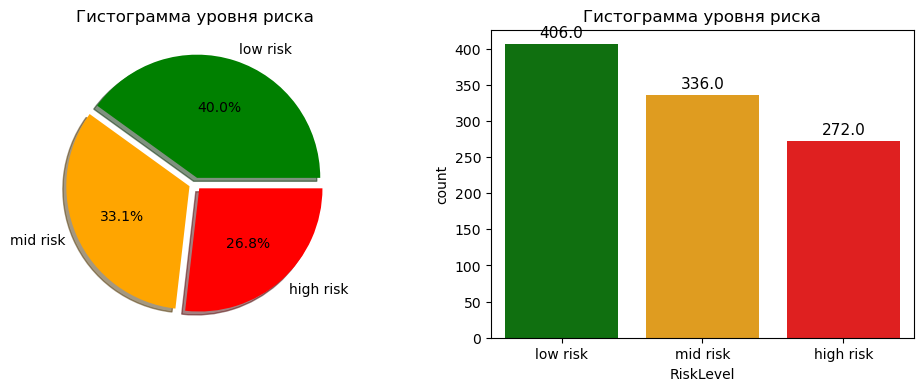

In [6]:
p_colors = ['green', 'orange', 'red']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

data["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Гистограмма уровня риска")
ax[0].set_ylabel('')

count = sns.countplot(x="RiskLevel", data=data, ax=ax[1], order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Гистограмма уровня риска")
plt.show()

Похоже, что большинство беременных женщин в этом наборе данных в основном имеют низкий риск для здоровья. Из 1014 наблюдений у 406 (40%) беременных низкий риск, у 336 (33,1%) средний риск, у 272 (26,8%) высокий риск. Мы изучим данные, чтобы получить больше информации и понять, почему у беременных женщин разный риск для здоровья. Мы постараемся проверить каждую переменную, которая может на нее повлиять. Давайте рассмотрим его один за другим.

## 4.2 Числовые переменные

В отличие от категориальных переменных, которые имеют только несколько значений, представляющих разные классы/категории, числовые переменные имеют непрерывное значение. Поэтому, чтобы понять распределение данных по каждой переменной, мы будем использовать **гистограмму** вместо гистограммы. Гистограмма — это диаграмма, похожая на гистограмму, но используемая для переменных уровня интервала и отношения.

Еще одна вещь, на которую следует обратить внимание в числовых данных, — это выбросы. Выброс — это наблюдение, которое находится на аномальном расстоянии от других значений в случайной выборке из совокупности. Если выбросы распределены неслучайно, они могут снизить нормальность (сделать график искаженным). Это увеличивает дисперсию ошибок и снижает мощность статистических тестов. Они могут вызвать предвзятость и/или повлиять на оценки. Мы будем использовать **блочную диаграмму** для визуализации непрерывных данных, чтобы выяснить, есть ли выбросы или нет.

Но перед этим мы можем использовать функцию *desctibe()* от pandas для отображения описательной статистики, включая те, которые обобщают центральную тенденцию, дисперсию и форму распределения набора данных для раннего наблюдения.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


Как мы видим, похоже, что в переменной Age, BS и HeartRate есть выброс. Но это лишь предварительное предположение. Давайте изучим данные глубже.

In [8]:
def num_plot(data, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])
    ax[0].set_title(f"{col} Distribution Histogram")
    ax[1].set_title(f"{col} Distribution Boxplot")

    plt.show()

### 4.2.1 Age

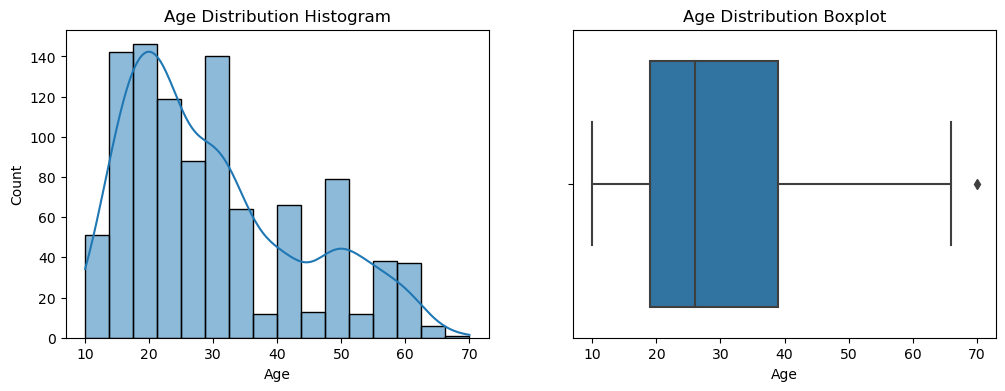

In [9]:
num_plot(data, "Age")

### 4.2.2 SystolicBP

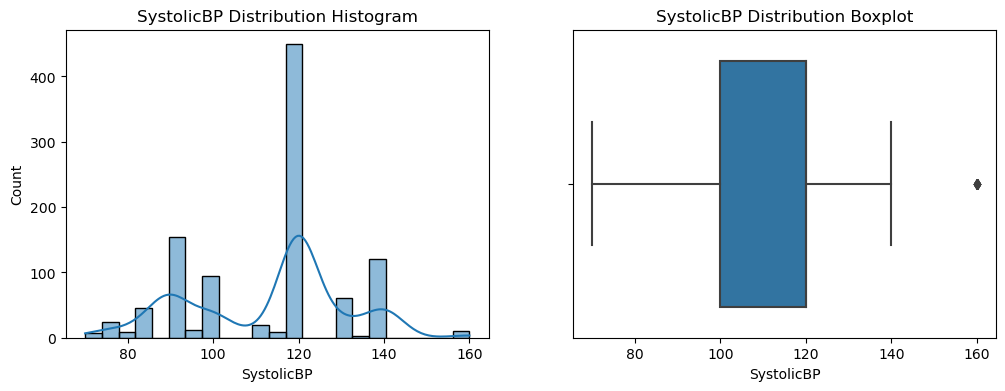

In [10]:
num_plot(data, "SystolicBP")

### 4.2.3 DiastolicBP

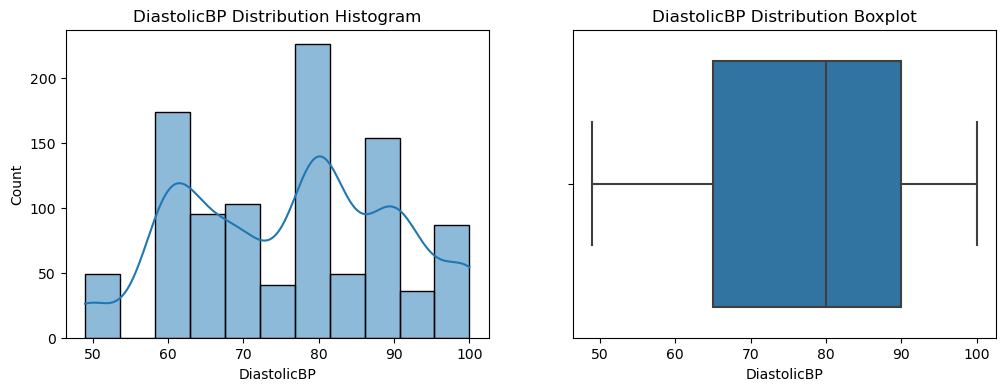

In [11]:
num_plot(data, "DiastolicBP")

### 4.2.4 BS

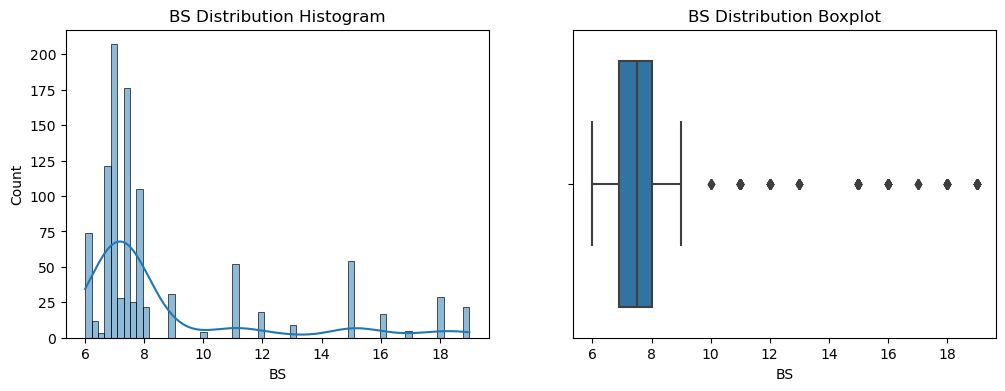

In [12]:
num_plot(data, "BS")

### 4.2.5 BodyTemp

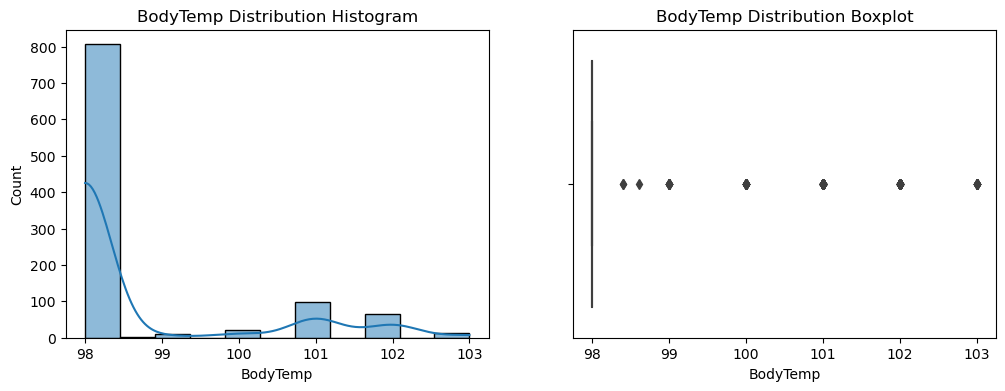

In [13]:
num_plot(data, "BodyTemp")

### 4.2.6 HeartRate

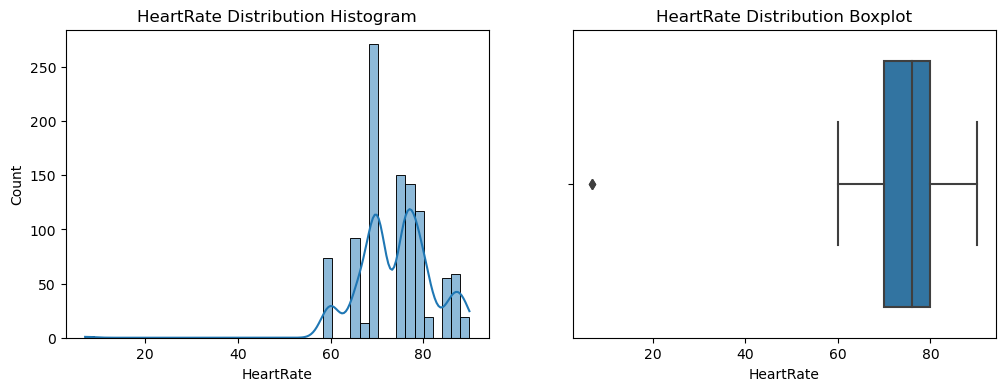

In [14]:
num_plot(data, "HeartRate")

Наблюдение: по-видимому, почти все переменные имеют выбросы, вызывающие асимметричное распределение. На данный момент мы просто проигнорируем этот выброс, потому что это значение кажется естественным в данном случае, за исключением HeartRate. Эта переменная имеет выброс со значением, которое слишком далеко от других значений.

# 5. Двумерный анализ

Двумерный анализ позволяет изучить отношения, существующие между двумя переменными. Это помогает выяснить, существует ли связь между переменными, и если да, то какова сила связи. Здесь одна переменная зависима, а другая независима. Мы можем использовать коэффициенты корреляции, чтобы узнать, насколько высока связь между двумя переменными. Мы также можем использовать точечную диаграмму, чтобы показать шаблоны, которые могут быть сформированы с использованием двух переменных.

## 5.1 Числовые переменные

C:\Users\dtata\AppData\Local\Temp\ipykernel_3664\3547603082.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="coolwarm")


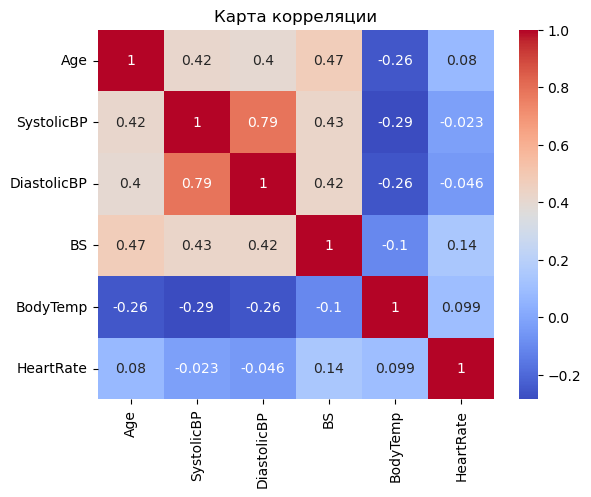

In [15]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Карта корреляции")
plt.show()

Поскольку у нас есть только 6 числовых переменных, мы просто будем использовать здесь парную диаграмму. Я думаю, что мы все еще можем ясно видеть график.

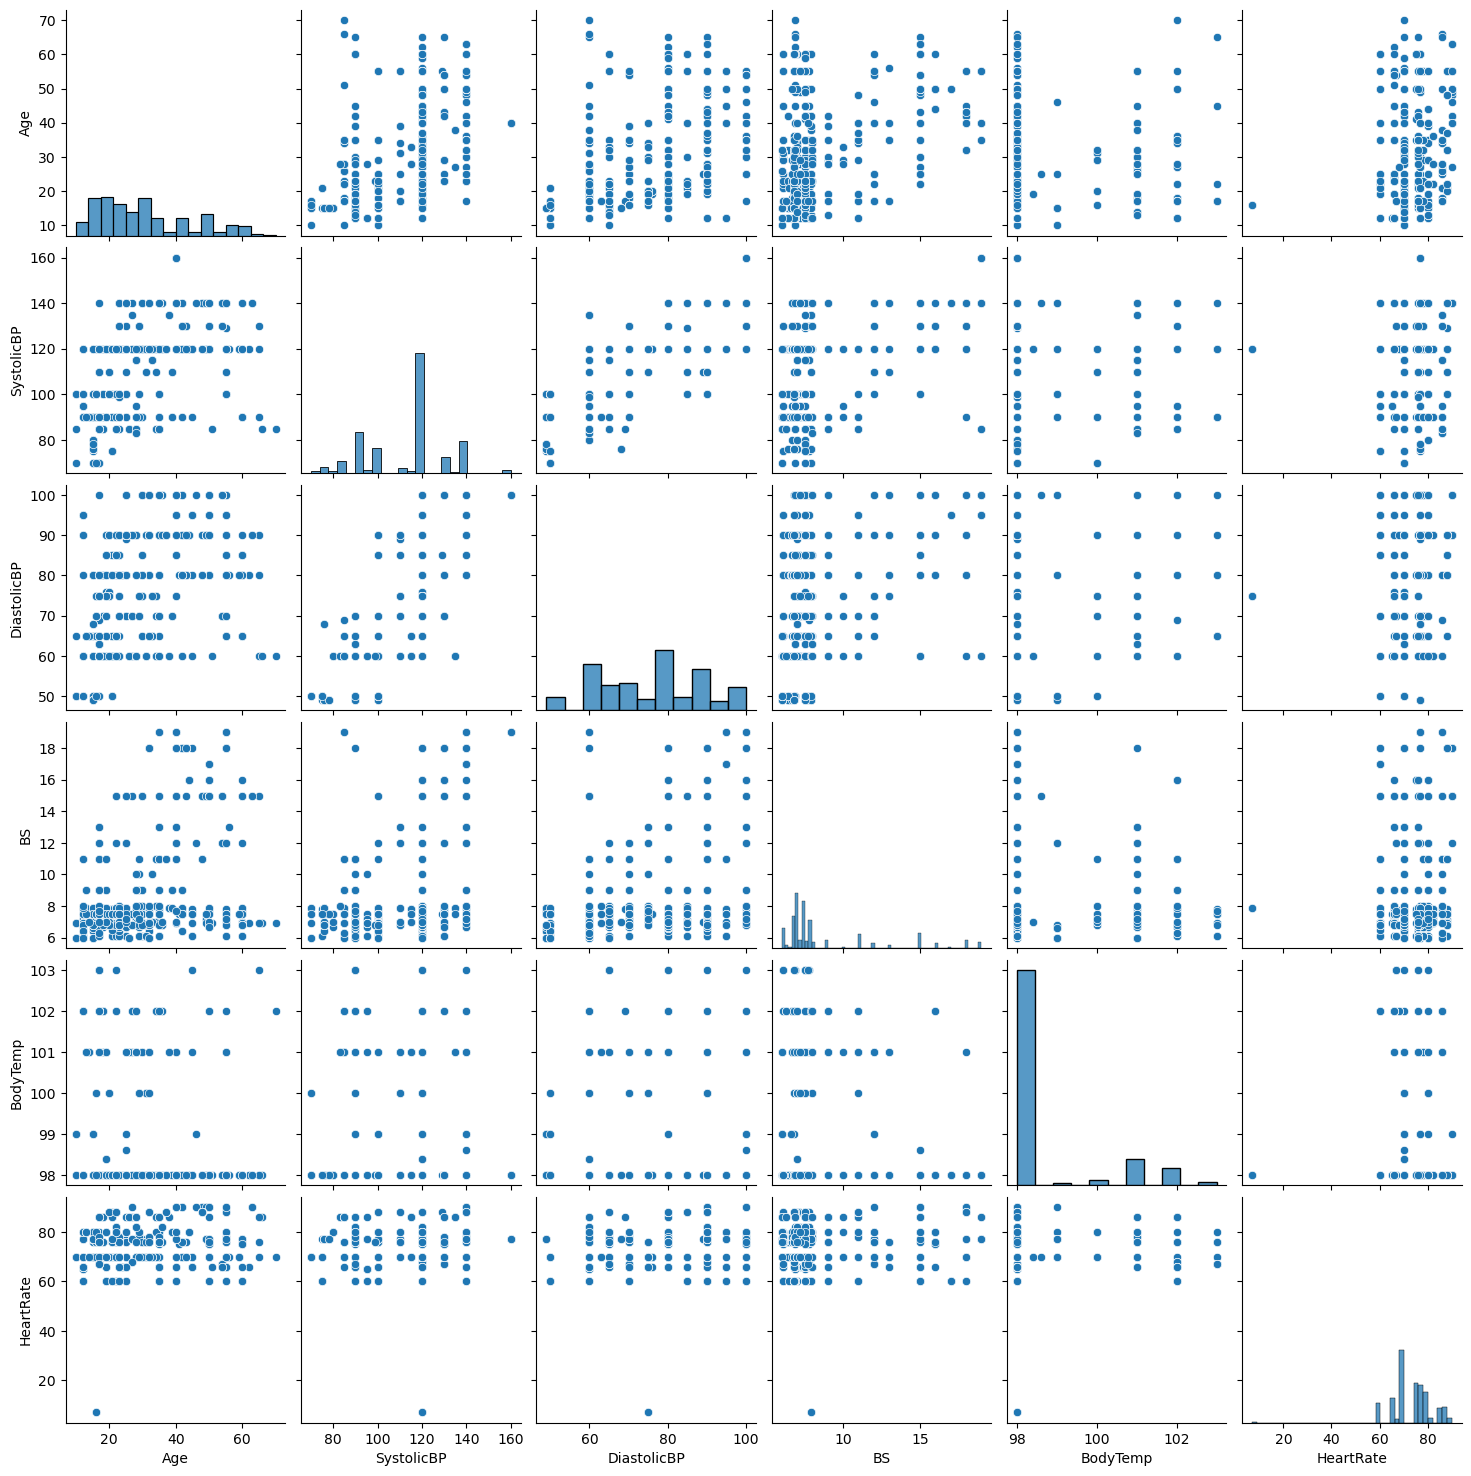

In [16]:
sns.pairplot(data)
plt.show()

Наблюдение: систолическое и диастолическое АД сильно коррелированы. Как видно из графика, они имеют положительную корреляцию со значением коэффициента корреляции = 0,79. Это означает, что переменные SystolicBP и DiastolicBP содержат очень похожую информацию, и разница в информации очень мала или отсутствует. Это известно как проблема, называемая мультиколинеарностью, которая подрывает статистическую значимость независимой переменной. Мы можем удалить одну из них, потому что нам не нужна избыточная переменная при создании или обучении нашей модели. Но мы попробуем копнуть глубже, чтобы решить, нужно ли нам удалять эти переменные, и какую переменную мы должны удалить.

## 5.2 Предиктор и цель

Мы будем использовать гистограмму с отображением оттенков, чтобы визуализировать распределение данных переменных-предикторов на основе целевой переменной. Кроме того, поскольку наша переменная-предиктор имеет всего несколько уникальных значений, мы также можем использовать кросс-таблицу pandas, чтобы увидеть подробные значения.

### 5.2.1 Age → RiskLevel

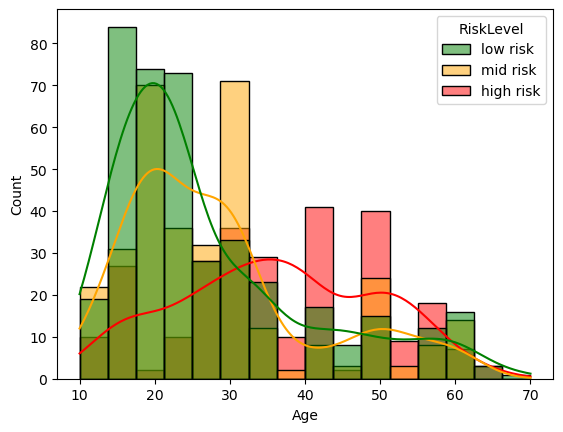

In [17]:
sns.histplot(data=data, x="Age", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [18]:
pd.crosstab(data.RiskLevel, data.Age).style.background_gradient(cmap='summer_r')

Age,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,54,55,56,59,60,62,63,65,66,70
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,7,3,3,0,0,24,0,2,0,0,5,5,0,21,0,2,5,8,10,0,18,2,3,22,2,6,2,2,34,0,4,3,0,1,1,16,2,22,0,9,17,1,0,7,0,2,1,0,0
low risk,2,15,2,0,56,10,18,8,28,11,27,28,42,3,16,0,5,7,2,6,7,18,0,2,21,0,0,0,0,1,1,15,0,0,8,0,4,5,5,1,0,12,0,2,13,1,0,2,1,1
mid risk,2,13,7,0,4,6,21,11,37,11,11,12,24,0,11,3,2,16,30,14,15,12,3,0,7,2,0,0,2,2,0,4,2,3,0,0,6,2,16,0,3,8,0,0,14,0,0,0,0,0


**Наблюдение:**
1. Беременные женщины в возрасте до 24 лет в основном имеют низкий риск для здоровья.
2. Риски для здоровья начнут возрастать после этого возраста (начиная с 25 лет).
3. Удивительно, но риск для здоровья беременных женщин старше 59 лет снижается.

### 5.2.2 SystolicBP → RiskLevel

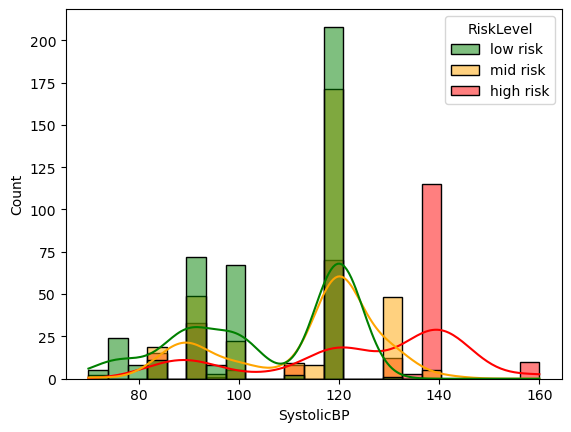

In [19]:
sns.histplot(data=data, x="SystolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [20]:
pd.crosstab(data.RiskLevel, data.SystolicBP).style.background_gradient(cmap='summer_r')

SystolicBP,70,75,76,78,80,83,85,90,95,99,100,110,115,120,129,130,135,140,160
RiskLevel,,,,,,,,,,,,,,,,,,,
high risk,0,0,0,0,0,2,13,33,1,0,5,8,0,70,0,12,3,115,10
low risk,5,8,16,3,5,0,11,72,8,2,65,2,0,208,1,0,0,0,0
mid risk,2,0,0,0,0,0,19,49,3,0,22,9,8,171,0,48,0,5,0


**Наблюдение:**
1. Беременные женщины с верхним значением артериального давления >= 100 мм рт. ст. в основном имеют низкий риск для здоровья.
2. Чем выше артериальное давление беременной женщины, тем выше риск для здоровья.

### 5.2.3 DiastolicBP → RiskLevel

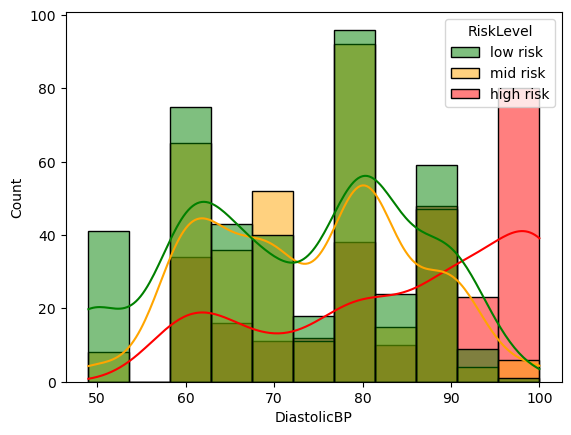

In [21]:
sns.histplot(data=data, x="DiastolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [22]:
pd.crosstab(data.RiskLevel, data.DiastolicBP).style.background_gradient(cmap='summer_r')

DiastolicBP,49,50,60,63,65,68,69,70,75,76,80,85,89,90,95,100
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,0,34,2,14,0,1,10,12,0,38,10,0,48,23,80
low risk,25,16,75,2,41,2,0,38,15,3,96,24,1,58,9,1
mid risk,0,8,65,4,32,0,0,52,11,0,92,15,0,47,4,6


**Наблюдение:**
1. Эта переменная имеет очень похожую структуру, что и SystolicBP. Это неудивительно, поскольку они сильно коррелированы.

### 5.2.4 BS → RiskLevel

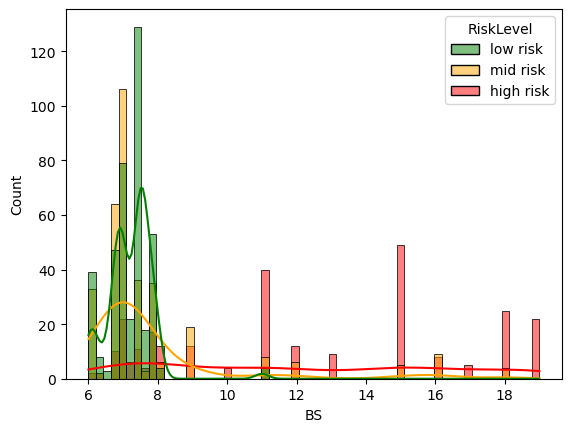

In [23]:
sns.histplot(data=data, x="BS", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [24]:
pd.crosstab(data.RiskLevel, data.BS).style.background_gradient(cmap='summer_r')

BS,6.000000,6.100000,6.300000,6.400000,6.500000,6.600000,6.700000,6.800000,6.900000,7.000000,7.010000,7.100000,7.200000,7.500000,7.600000,7.700000,7.800000,7.900000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,15.000000,16.000000,17.000000,18.000000,19.000000
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,2,2,0,0,0,0,10,8,9,5,0,6,11,0,4,5,12,12,12,4,40,12,9,49,8,5,25,22
low risk,7,32,0,8,1,2,10,37,47,29,3,8,14,129,1,17,19,34,4,0,0,4,0,0,0,0,0,0,0
mid risk,14,19,0,2,0,0,23,41,58,41,7,0,0,36,0,3,21,14,6,19,0,8,6,0,5,9,0,4,0


**Наблюдение:**
1. Почти каждая беременная женщина с уровнем глюкозы в крови >= 8 имеет высокий риск для здоровья.
2. Но в остальном у них, по-видимому, более низкий риск для здоровья с уровнем глюкозы в крови < 8.

### 5.2.5 BodyTemp → RiskLevel

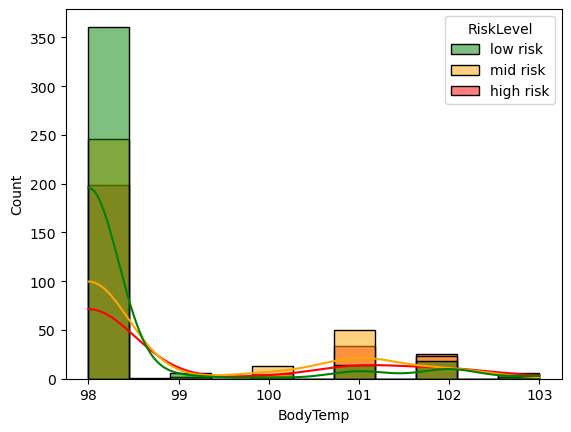

In [25]:
sns.histplot(data=data, x="BodyTemp", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [26]:
pd.crosstab(data.RiskLevel, data.BodyTemp).style.background_gradient(cmap='summer_r')

BodyTemp,98.000000,98.400000,98.600000,99.000000,100.000000,101.000000,102.000000,103.000000
RiskLevel,,,,,,,,
high risk,199,0,1,2,5,34,25,6
low risk,359,2,0,6,2,14,18,5
mid risk,246,0,0,2,13,50,23,2


**Наблюдение:**
1. Большинство беременных женщин имеют температуру тела 98 F, что является нормальной температурой тела.
2. Беременные женщины с температурой тела >= 100 в основном имеют более высокий риск для здоровья.

### 5.2.6 HeartRate → RiskLevel

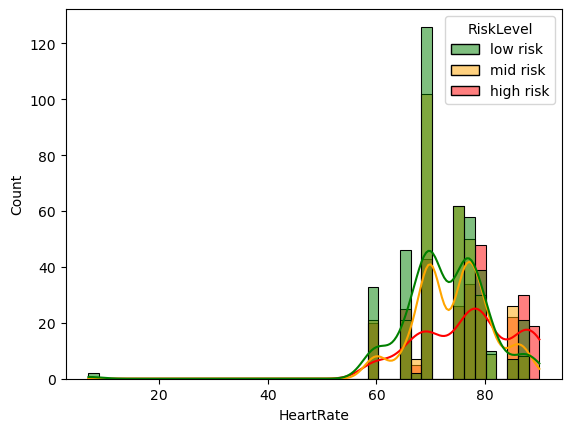

In [27]:
sns.histplot(data=data, x="HeartRate", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [28]:
pd.crosstab(data.RiskLevel, data.HeartRate).style.background_gradient(cmap='summer_r')

HeartRate,7,60,65,66,67,68,70,75,76,77,78,80,82,86,88,90
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,20,0,25,5,0,43,6,20,25,9,48,0,22,30,19
low risk,2,33,2,44,2,0,126,7,55,56,2,39,10,7,21,0
mid risk,0,21,3,18,5,2,102,6,56,15,35,30,9,26,8,0


**Наблюдение:**
1. Как я упоминал ранее, переменная HeartRate имеет выброс со значением, которое выглядит неестественно, то есть 6 ударов в минуту.
2. Похоже, что риски для здоровья становятся выше вместе с частотой сердечных сокращений.

# 6. Многомерный анализ

Многофакторный анализ включает в себя анализ нескольких переменных (более двух), чтобы выявить любую возможную связь и найти взаимосвязь между ними. В частности, мы попытаемся связать более одной переменной-предиктора с переменной ответа.

В этом случае мы просто проанализируем влияние двух разных переменных-предикторов одновременно на переменную RiskLevel. Мы будем использовать точечную диаграмму, поскольку все наши переменные-предикторы имеют числовые значения, а затем сгруппируем их, используя значения RiskLevel с разными цветами.

## 6.1 Возраст и систолическое АД → Уровень риска

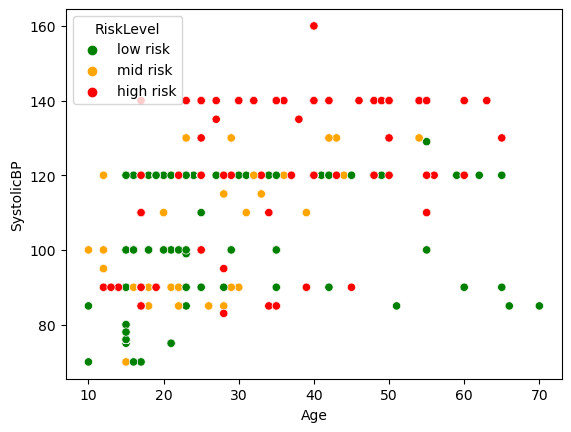

In [29]:
sns.scatterplot(data=data, x="Age", y="SystolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Observation:**
1. Pregnant women with high SystolicBP seems to have a high health risk, regardless of their age.
2. Having low SystolicBP at a young age (under 50 years) doesn't guarantee does not guarantee our health risk is low, but it seems to have it in old age makes our health risks lower.

## 6.2 Age and DiastolicBP → RiskLevel

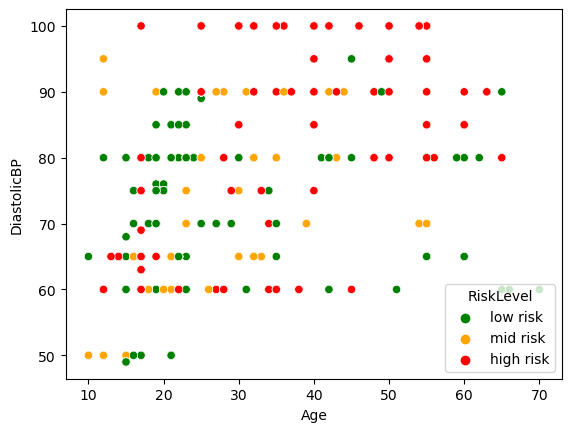

In [30]:
sns.scatterplot(data=data, x="Age", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Наблюдение:**
1. Мы можем видеть ту же картину, что и раньше, поскольку систолическое и диастолическое АД сильно коррелированы.

## 6.3 Age and BS → RiskLevel

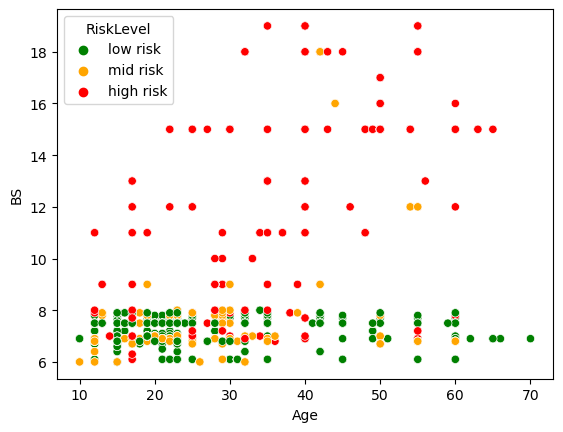

In [31]:
sns.scatterplot(data=data, x="Age", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Наблюдение:**
1. Беременные женщины с высоким уровнем глюкозы в крови, по-видимому, имеют высокий риск для здоровья, независимо от их возраста.

## 6.4 Age and BodyTemp → RiskLevel

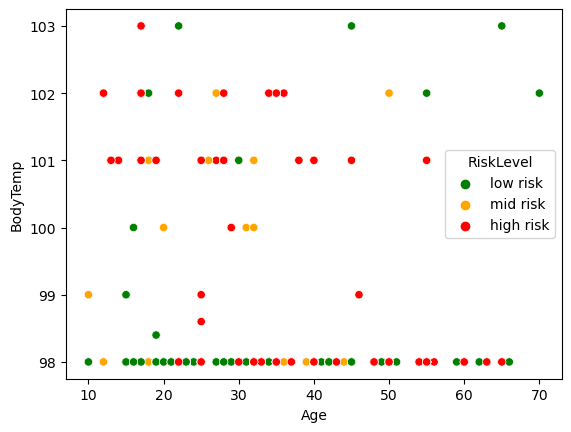

In [32]:
sns.scatterplot(data=data, x="Age", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Наблюдение:**
1. Молодые женщины с нормальной температурой тела в основном имеют низкий риск для здоровья, но они будут иметь более высокий риск, если у них будет высокая температура тела.
2. Высокая температура тела у пожилых женщин, по-видимому, не оказывает существенного влияния на их здоровье.

## 6.5 Age and HeartRate → RiskLevel

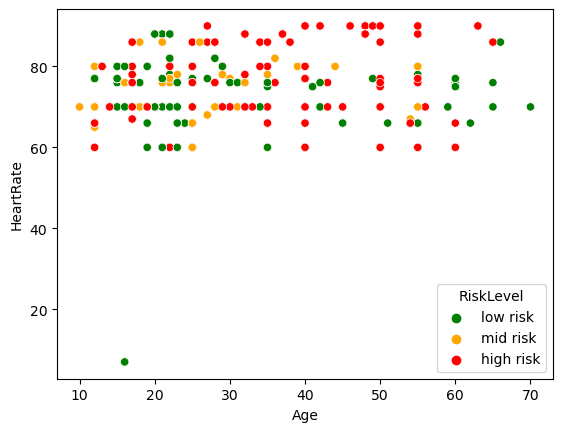

In [33]:
sns.scatterplot(data=data, x="Age", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Наблюдение:**
1. Кажется, что частота сердечных сокращений меньше влияет на риск для здоровья беременных женщин по сравнению с возрастом.

## 6.6 SystolicBP and DiastolicBP → RiskLevel

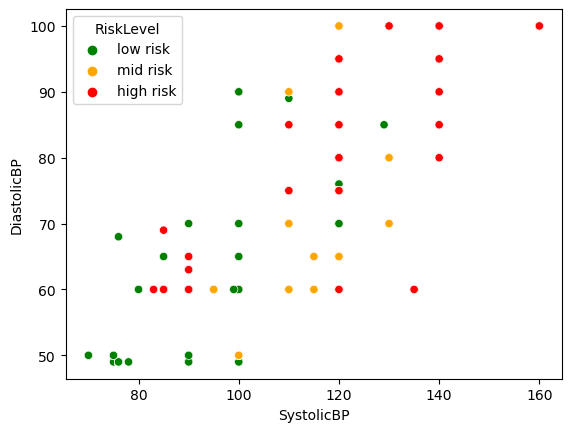

In [34]:
sns.scatterplot(data=data, x="SystolicBP", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Наблюдение:**
1. По-видимому, беременные женщины с более низким систолическим и диастолическим АД имеют более низкий риск для здоровья.
2. Но в остальном, чем выше у них систолическое и диастолическое АД, тем выше риск для их здоровья.

## 6.7 SystolicBP and BS → RiskLevel

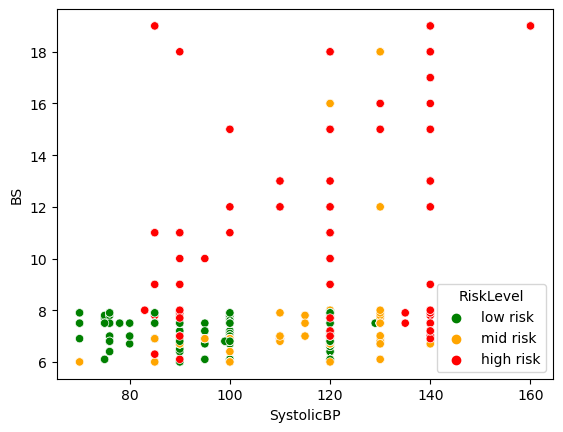

In [35]:
sns.scatterplot(data=data, x="SystolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Наблюдение:**
1. Мы видим почти ту же картину, что и раньше.
2. Тем не менее, более высокое значение BS, по-видимому, больше влияет на риск для здоровья беременных женщин.

## 6.8 SystolicBP and BodyTemp → RiskLevel

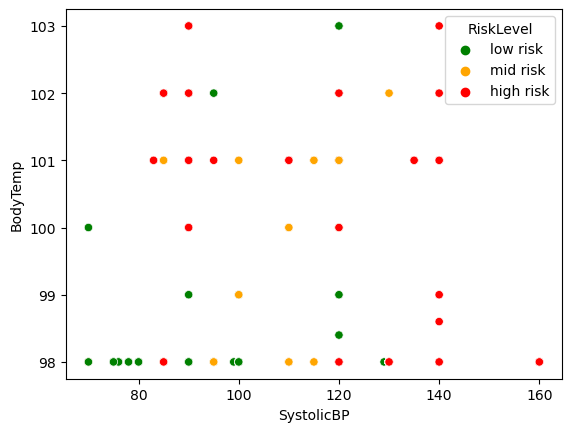

In [36]:
sns.scatterplot(data=data, x="SystolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Наблюдение:**
1. Беременные женщины с нормальной температурой тела и низким систолическим АД чаще всего имеют низкий риск для здоровья.
2. Но тот, у кого высокое систолическое АД, кажется, имеет более высокий риск для здоровья, независимо от температуры тела.

## 6.9 SystolicBP and HeartRate → RiskLevel

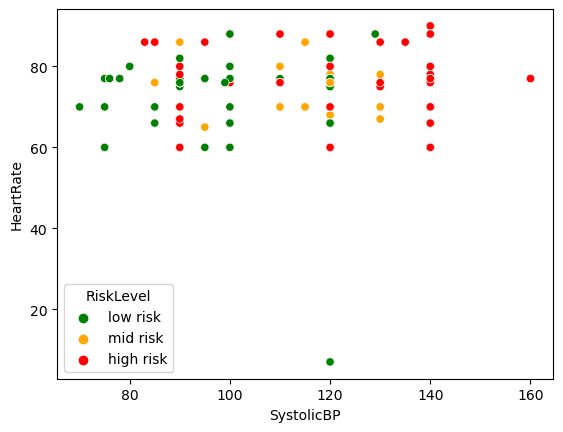

In [37]:
sns.scatterplot(data=data, x="SystolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Наблюдение:**
1. По-видимому, значение ЧСС оказывает меньшее влияние на риск для здоровья беременных женщин по сравнению с САД.
2. Похоже, что переменная частота сердечных сокращений не очень полезна.

## 6.10 DiastolicBP and BS → RiskLevel

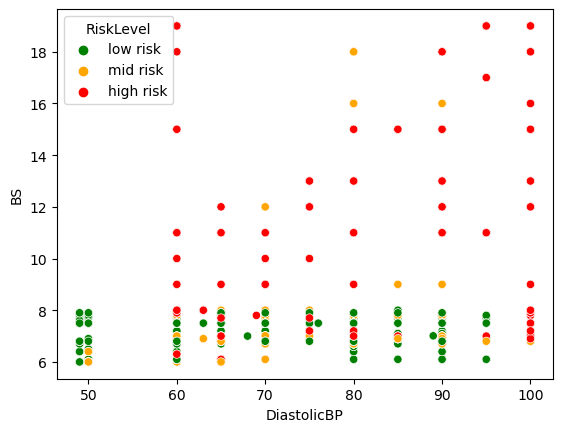

In [38]:
sns.scatterplot(data=data, x="DiastolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Наблюдение:**
1. Беременные женщины с высоким уровнем глюкозы в крови имеют более высокий риск для здоровья, независимо от их диастолического АД.

## 6.11 DiastolicBP and BodyTemp → RiskLevel

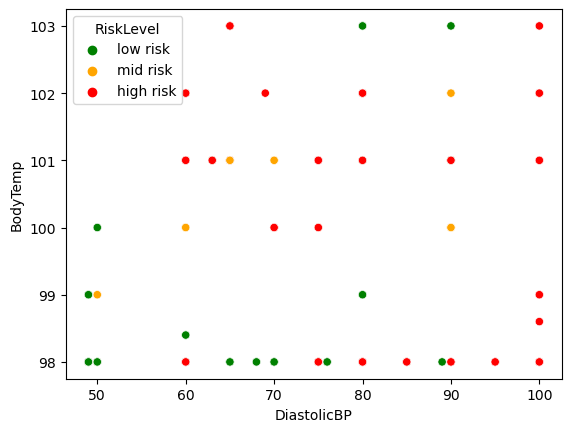

In [39]:
sns.scatterplot(data=data, x="DiastolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Наблюдение:**
1. Беременные женщины с низким диастолическим АД и низкой температурой тела в основном имеют низкий риск для здоровья, но их риск для здоровья будет выше, если у них будет более высокая температура тела.

## 6.12 DiastolicBP and HeartRate → RiskLevel

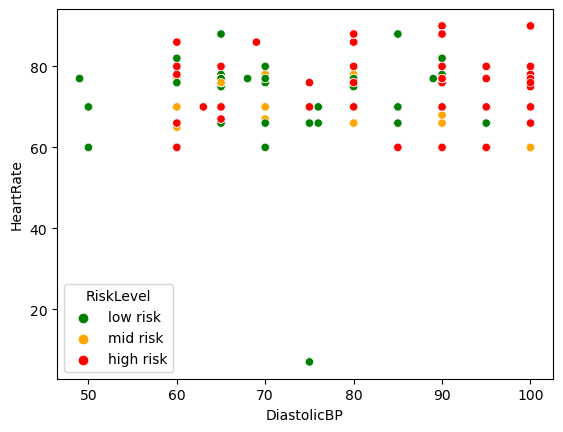

In [40]:
sns.scatterplot(data=data, x="DiastolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Наблюдение:**
1. Опять же, значение HeartRate оказывает меньшее влияние на риск для здоровья беременных женщин по сравнению с DiastolicBP.
2. Похоже, что переменная частота сердечных сокращений не очень полезна.

## 6.13 BS and BodyTemp → RiskLevel

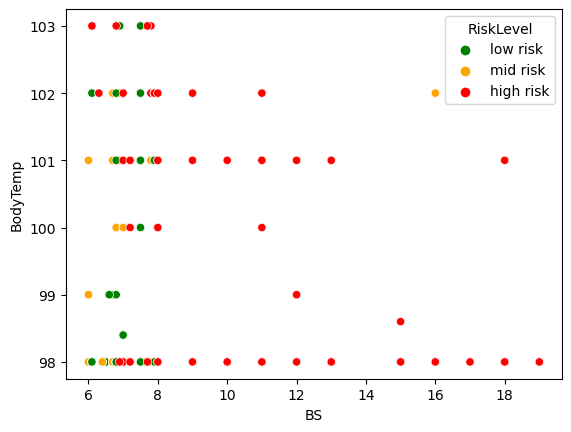

In [41]:
sns.scatterplot(data=data, x="BS", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Наблюдение:**
1. Беременные женщины с высоким уровнем глюкозы в крови, по-видимому, имеют высокий риск для здоровья, независимо от температуры их тела.

## 6.14 BS and HeartRate → RiskLevel

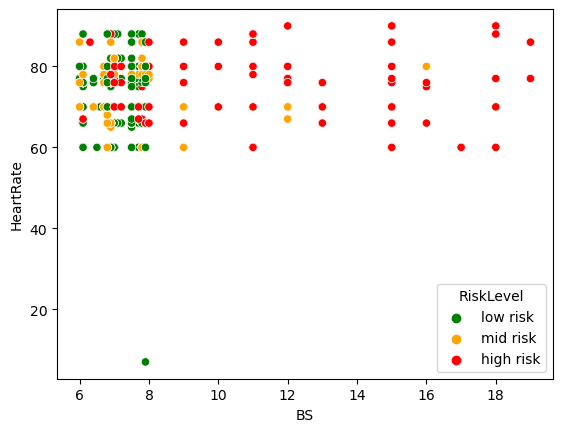

In [42]:
sns.scatterplot(data=data, x="BS", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Наблюдение:**
1. По-видимому, беременные женщины с более высоким уровнем глюкозы в крови, по-видимому, имеют более высокий риск для здоровья, независимо от их частоты сердечных сокращений.

## 6.15 BodyTemp and HeartRate → RiskLevel

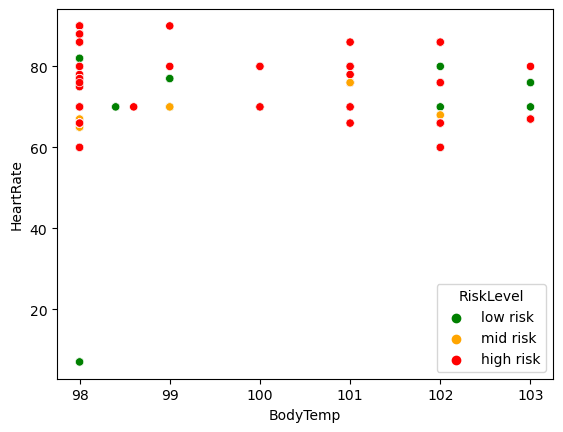

In [43]:
sns.scatterplot(data=data, x="BodyTemp", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Наблюдение:**
1. Беременные женщины с более высокой температурой тела, по-видимому, имеют более высокий риск для здоровья, независимо от их частоты сердечных сокращений (обратите внимание, что, согласно предыдущему анализу, беременные женщины в этом наблюдении в основном имеют температуру тела 98 F).
2. Переменная HeartRate в этом случае действительно бесполезна.

# 7. Разработка функций и очистка данных

## 7.1 Обработка выбросов

Как мы знаем из предыдущего анализа, в этом наборе данных есть несколько переменных, которые имеют выбросы, но даже в этом случае большинство этих значений по-прежнему имеют смысл в реальной жизни. Единственная переменная, которая имеет выброс с необоснованным значением, — это HeartRate. В этой переменной есть два наблюдения со значением частоты сердечных сокращений 7 ударов в минуту (ударов в минуту). Нормальная частота сердечных сокращений в покое для взрослых колеблется от 60 до 100 ударов в минуту, а самая низкая зарегистрированная частота сердечных сокращений в состоянии покоя в истории человечества составляла 25 ударов в минуту. Поэтому мы отбросим эти 2 записи со значением частоты сердечных сокращений 7, потому что это значение не имеет никакого смысла и, скорее всего, является ошибкой ввода.

Мы не будем хранить обработанные данные в исходной переменной, а вместо этого будем хранить их в новой переменной, чтобы мы могли сравнить их с исходными данными.

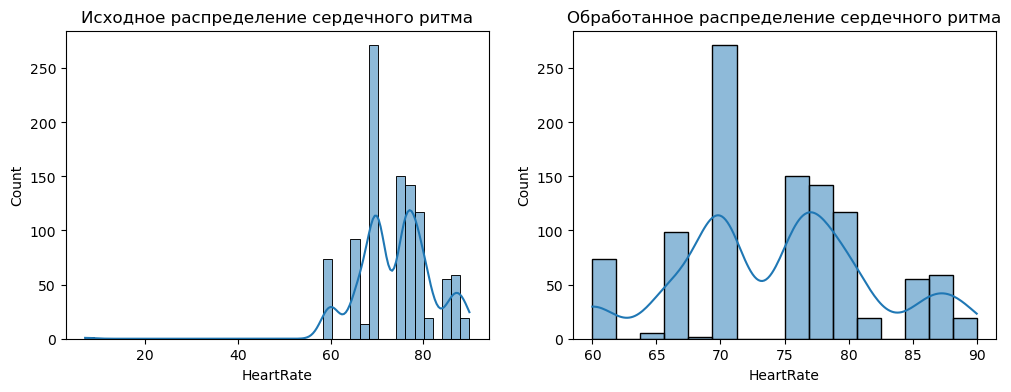

In [44]:
data_proc = data.drop(data.index[data.HeartRate == 7])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=data, x="HeartRate", kde=True, ax=ax[0])
sns.histplot(data=data_proc, x="HeartRate", kde=True, ax=ax[1])
ax[0].set_title("Исходное распределение сердечного ритма")
ax[1].set_title("Обработанное распределение сердечного ритма")
plt.show()

## 7.2 Удаление ненужных функций

Проведя несколько анализов переменных-предикторов, мы пришли к выводу, что переменная HeartRate менее полезна для определения рисков для здоровья беременных женщин. Таким образом, можно безопасно удалить эту переменную.

In [45]:
data_proc = data_proc.drop(["HeartRate"], axis=1)

Вы можете подумать, почему мы удаляем записи с выбросом в переменной HeartRate, если в конце мы удалим эту переменную. Ответ заключается в том, что в нем есть ошибка ввода, поэтому записи могут быть незаконными. Может случиться так, что данная метка также неверна, поэтому она будет вводить в заблуждение процесс обучения, что сделает модель менее точной.

# 8. Построение модели

## 8.1 Разделение набора данных

Мы разделим наш набор данных на 80% данных поезда и 20% тестовых данных.

In [46]:
# Original Dataset
X = data.drop("RiskLevel", axis=1)
y = data.RiskLevel
x_train, x_test, y_train, y_test = split(X, y, test_size=0.2, random_state=1)

# Processed Dataset
X_proc = data_proc.drop("RiskLevel", axis=1)
y_proc = data_proc.RiskLevel
x_train_proc, x_test_proc, y_train_proc, y_test_proc = split(X_proc, y_proc, test_size=0.2, random_state=1)

print(f"Исходный датасет {x_train.shape[0]} train data and {x_test.shape[0]} test data\n")
print(f"Предобработанный датасет {x_train_proc.shape[0]} train data and {x_test_proc.shape[0]} test data")

Исходный датасет 811 train data and 203 test data

Предобработанный датасет 809 train data and 203 test data


## 8.2 Модель классификации зданий

В этом случае мы будем использовать алгоритм Random Forest для построения нашей модели. Случайный лес содержит множество деревьев решений, представляющих отдельный экземпляр классификации входных данных. Техника случайного леса рассматривает экземпляры по отдельности, принимая за выбранный прогноз тот, у которого больше всего голосов. Таким образом, случайный лес позволяет любым классификаторам со слабыми корреляциями создать сильный классификатор.

Мы выбираем Random Forest, потому что это один из самых точных доступных алгоритмов обучения, и время его обучения мало. Кроме того, Random Forest может работать с набором данных, который имеет значения признаков с разным масштабом, поэтому нам не нужно выполнять нормализацию/масштабирование признаков.

In [47]:
# Using original dataset
rf = RandomForestClassifier(random_state=100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Accuracy исходного датасета: {accuracy_score(y_test, y_pred)}")

# Using processed dataset
rf2 = RandomForestClassifier(random_state=100)
rf2.fit(x_train_proc, y_train_proc)
y_pred = rf2.predict(x_test_proc)
print(f"Accuracy предобработанного: {accuracy_score(y_test_proc, y_pred)}")

Accuracy исходного датасета: 0.8669950738916257
Accuracy предобработанного: 0.8916256157635468


Вот так. Мы получили на 2,46% больше точности тестовых данных с нашим обработанным набором данных. Это показывает, что наша модель лучше обобщает обработанный набор данных для наших тестовых данных. Мало того, Random Forest также имеет несколько гиперпараметров, которые мы можем настроить, чтобы получить модель с еще лучшим обобщением.

## 8.3 Настройка гиперпараметров

Мы попробуем настроить 2 параметра Random Forest, а именно n_estimators и критерий. n_estimator — это количество деревьев в лесу, а критерий — это функция для измерения качества разделения. Для этого мы будем использовать GridSearchCrossValidation с количеством сгибов до 10.

In [48]:
params = {
    "n_estimators": [10, 20, 50, 100],
    "criterion": ["gini", "entropy"]
}
rf = RandomForestClassifier(random_state=100)
grid = GridSearchCV(rf, params, cv=10)
grid.fit(x_train_proc, y_train_proc)
print("Лучшие гиперпараметры:", grid.best_params_)

Лучшие гиперпараметры: {'criterion': 'gini', 'n_estimators': 50}


In [49]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")[["params", "mean_test_score", "rank_test_score"]]

,params,mean_test_score,rank_test_score
2,"{'criterion': 'gini', 'n_estimators': 50}",0.831867,1
3,"{'criterion': 'gini', 'n_estimators': 100}",0.830648,2
7,"{'criterion': 'entropy', 'n_estimators': 100}",0.828179,3
6,"{'criterion': 'entropy', 'n_estimators': 50}",0.828164,4
1,"{'criterion': 'gini', 'n_estimators': 20}",0.823241,5
5,"{'criterion': 'entropy', 'n_estimators': 20}",0.822006,6
4,"{'criterion': 'entropy', 'n_estimators': 10}",0.818210,7
0,"{'criterion': 'gini', 'n_estimators': 10}",0.808302,8


In [50]:
y_pred = grid.predict(x_test_proc)
print(f"Accuracy предобработанного датасета: {accuracy_score(y_test_proc, y_pred)}")

Accuracy предобработанного датасета: 0.9014778325123153


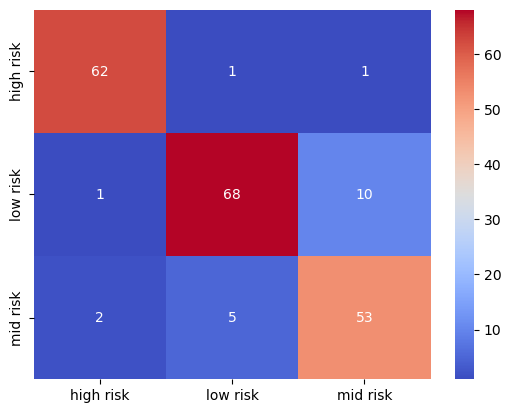

In [51]:
labels = np.unique(y_pred)
sns.heatmap(confusion_matrix(y_test_proc, y_pred), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()

Вот и все. После настройки гиперпараметров мы получили лучшее значение для критерия «джини», а n_estimators равно 50. При таком значении параметра точность полученной модели увеличилась почти на 1% по сравнению с тестовыми данными. Хоть это и не много, но все же улучшение от получившейся модели есть.

# Заключение

Проведя некоторый анализ этого набора данных, мы можем сделать вывод, что BS или уровень глюкозы в крови является наиболее важной переменной в определении уровня здоровья беременных женщин. Беременные женщины с высоким уровнем глюкозы в крови, как правило, имеют высокий риск для здоровья. Более 75% беременных с BS 8 и более имеют высокий риск для здоровья. BS также имеет относительно сильную положительную корреляцию с возрастом, систолическим и диастолическим АД, поэтому беременным женщинам с высоким возрастом, систолическим и диастолическим АД следует быть бдительными. Возраст также является довольно важной переменной, поскольку риски для здоровья беременных женщин, по-видимому, начинают увеличиваться, начиная с 25-летнего возраста. Для систолического и диастолического АД эти две переменные действительно имеют сильную взаимосвязь, о чем свидетельствует значение коэффициента корреляции, равное 0,79. Что касается BodyTemp, эта переменная на самом деле не дает много информации, потому что более 79% от общего значения составляет 98F. Но из этой переменной мы знаем, что беременные женщины с температурой тела выше 98,4 F, как правило, имеют больший риск для здоровья. И последний параметр — частота сердечных сокращений, наименее значимая переменная для определения уровня здоровья беременных женщин.

И, наконец, мы можем построить нашу модель классификации, используя алгоритм Random Forest для этого набора данных. С исходным набором данных мы получаем точность 86,7%. Но после того, как мы проделаем некоторую инженерию функций и очистку данных, удалив выбросы и ненужную переменную, точность, которую мы получим, возрастет до 89,16%. Это показывает, что наша модель лучше обобщается с нашим обработанным набором данных. Мы также выполнили настройку гиперпараметров, чтобы получить лучший гиперпараметр для алгоритма Random Forest. Используя лучшие из полученных гиперпараметров, модель способна обеспечить более высокую точность, которая составляет 90,15%.